In [1]:
import matplotlib.pyplot as plt
import numpy as np
import wave
from playsound import playsound

In [2]:
#prev functions

def plot_signal(x,signal):
    plt.xlabel("n")
    plt.ylabel("h[n]")
    plt.stem(x, signal, use_line_collection = True) 
    plt.show()

#Analysys equation
def DTFT(w,signal,n):
    y = []
    #Appending the summations for all omegas(w)
    for i in range(len(w)):

        #Summation for analysis equation for a particular omega(w[i])
        sum = 0
        for j in range(len(signal)):
              sum += signal[j]*complex(np.cos(w[i]*n[j]),-np.sin(w[i]*n[j]))
        y.append(sum)
    return y

def plot_spectrums(y,w):
    mag = []
    phase = []
    for i in range(len(w)):
        mag.append(abs(y[i]))
        phase.append(np.angle(y[i]))
    #Plotting the spectrums
    plt.title("Magnitude spectrum")
    plt.xlabel("ω")
    plt.ylabel("magnitude")
    plt.plot(w,mag)
    plt.show()
    plt.title("Phase spectrum")
    plt.xlabel("ω")
    plt.ylabel("phase(Radians)")
    plt.plot(w,phase)
    plt.show()

#Convolution function accepts input signal and impulse response as the parameters
def Convolution(x,h):
    k = len(x)                                         #variable k stores length of input signal
    l = len(h)                                         #variable l stores length of impulse response
    p = k+l
    Y = np.zeros(p-1)                                  #length of output signal of convolution is k+l-1
    for i in range(0,p-1):                             #Filling in all the array values of output signal
        for j in range(0,k):                           #iteration over length of impulse response signal
            if i-j < l and i-j >= 0  :                 #impulse response is defined only for index greater than or equal to 0 and less than signal length
                Y[i]=Y[i]+x[j]*h[i-j]                  #Convolution sum
    return Y                                           #returns output signal i.e convolution of x and h

Spectrums of Y(e^jω) :-


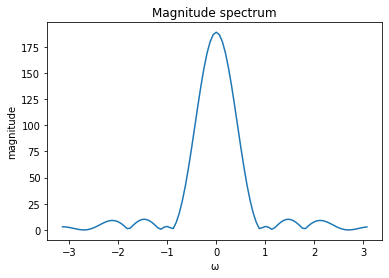

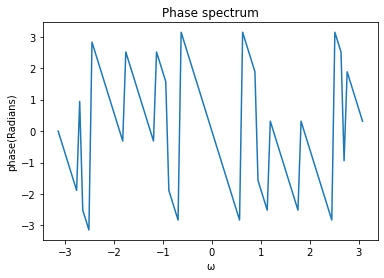

Spectrums of X(e^jω)H(e^jω) :-


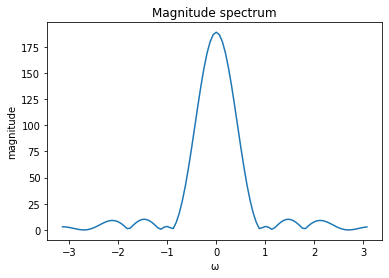

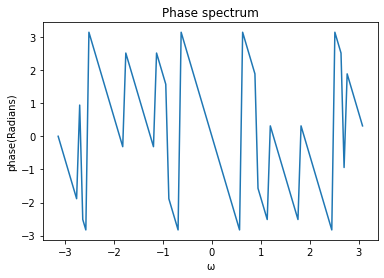

We can see that the spectrums of Y(e^jω) and X(e^jω)H(e^jω) for the signals x and h.
So we can say that convolution in time domain is same as multiplation of their DTFT's in frequency domain


In [3]:
#1st question
x=[2,2,1,2,2]             #input signal x[n]
h=[3,3,3,3,3,3,3]         #impulse response h[n]
xn = np.linspace(0,len(x)-1,len(x))
hn = np.linspace(0,len(h)-1,len(h))

y = Convolution(x,h)      #convolution  y[n] = x[n]*h[n]
yn = np.linspace(0,len(y)-1,len(y)) 
W = np.linspace(-np.pi,np.pi,100,endpoint=False) #range of omega

x_dtft = DTFT(W,x,xn)
h_dtft = DTFT(W,h,hn)

mul = np.multiply(x_dtft,h_dtft)    #X(e^jω)H(e^jω)
y_dtft = DTFT(W,y,yn)               #Y(e^jω)

print("Spectrums of Y(e^jω) :-")
plot_spectrums(y_dtft,W)
print("Spectrums of X(e^jω)H(e^jω) :-")
plot_spectrums(mul,W)

print("We can see that the spectrums of Y(e^jω) and X(e^jω)H(e^jω) for the signals x and h.")
print("So we can say that convolution in time domain is same as multiplation of their DTFT's in frequency domain") 


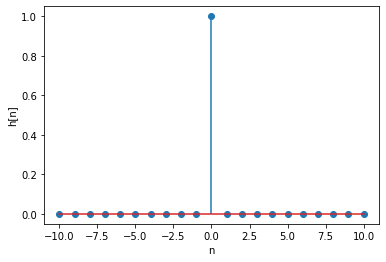

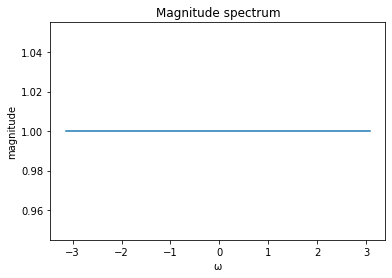

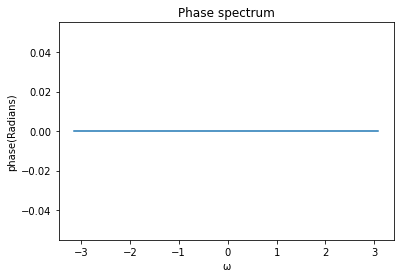

Observations:
1.From magnitude and phase spectra of impulse response plots we can observe that the magnitude is 1 i.e constant and phase is 0 radians. So, for this LTI system the output is same as input


In [4]:
#2(a)
#input response as h[n]=delta(n)
#defining delta function
def Delta(n):
    if n!=0:     #if n!=0 then it returns 0
        return 0  
    else:
        return 1 #else it returns zero

k = 10  #For the range of the signal i.e signal lies between -k to k

W = np.linspace(-np.pi,np.pi,100,endpoint=False) #range of omega

m=[i for i in range(-k,k+1)]
ha=[Delta(i) for i in m]
#taking DTFT Delta(n)
z = DTFT(W,ha,m)
#plotting the response signal
plot_signal(m,ha)
#plotting the magnitude and phase spectra 
plot_spectrums(z,W)
print("Observations:")
print("1.From magnitude and phase spectra of impulse response plots we can observe that the magnitude is 1 i.e constant and phase is 0 radians. So, for this LTI system the output is same as input")

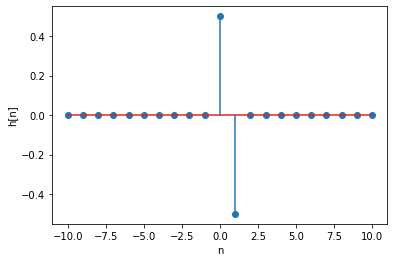

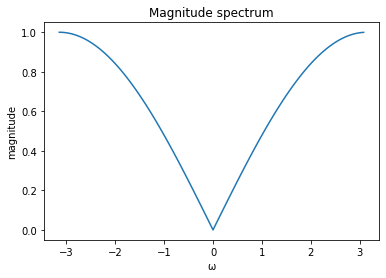

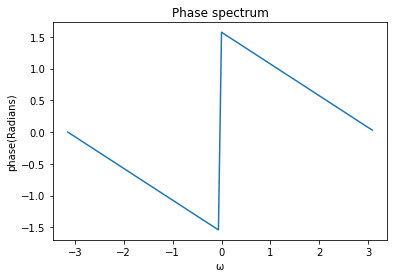

Observations:
1.From magnitude spectrum of impulse response we can observe that it's behavior is same to that of high pass filter as low frequencies are attenuated and high frequencies are passes.
2.From phase spectrum of impulse response we can observe that this LTI system is linear phase system.


In [5]:
#2(b)
#defining the response signal
def h(n):
    inp=0.5*Delta(n)-0.5*Delta(n-1)
    return inp  

m=[i for i in range(-k,k+1)]
#response signal
hb=[h(i) for i in m]
#DTFT of response signal
z = DTFT(W,hb,m)
#plotting the response signal
plot_signal(m,hb)
#plotting the magnitude and phase spectra 
plot_spectrums(z,W)
print("Observations:")
print("1.From magnitude spectrum of impulse response we can observe that it's behavior is same to that of high pass filter as low frequencies are attenuated and high frequencies are passes.")
print("2.From phase spectrum of impulse response we can observe that this LTI system is linear phase system.")

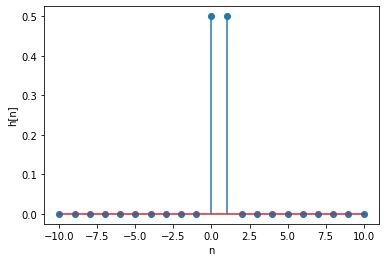

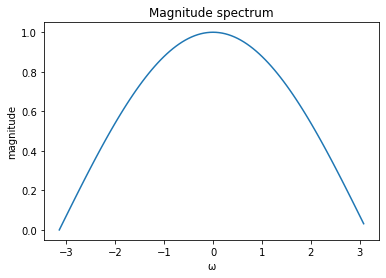

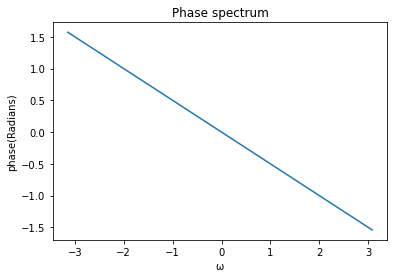

Observations:
1.From magnitude spectrum of impulse response we can observe that it's behaviour is same as that of low pass filter as low pass frequencies are attenuated and high frequencies are passed.
2.From phase spectrum of impulse response we can observe that this LTI system is linear phase system.


In [6]:
#2(c)
#defining the response signal 
def h(n):
    inp=0.5*Delta(n)+0.5*Delta(n-1)
    return inp

m=[i for i in range(-k,k+1)]
#response signal
hc=[h(i) for i in m]
#DTFT of response signal
z = DTFT(W,hc,m)
#plotting the response signal
plot_signal(m,hc)
#plotting the magnitude and phase spectra
plot_spectrums(z,W)
print("Observations:")
print("1.From magnitude spectrum of impulse response we can observe that it's behaviour is same as that of low pass filter as low pass frequencies are attenuated and high frequencies are passed.")
print("2.From phase spectrum of impulse response we can observe that this LTI system is linear phase system.")

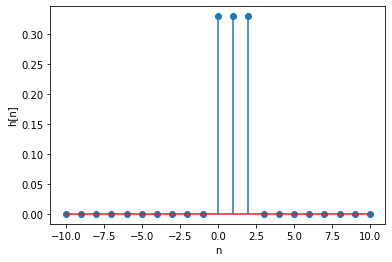

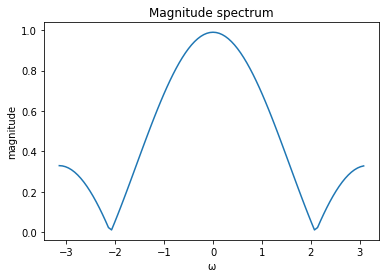

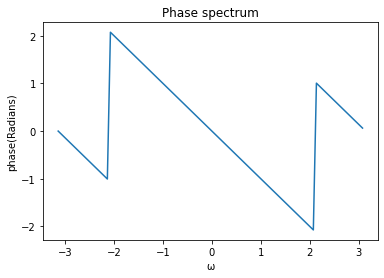

Observations:
1.From magnitude spectrum of impulse response we can observe that this LTI systems behaves as low pass filter from 0 to 2 rad/s and as high pass filter from 2 to pi rad/s. so, we can conclude that it behaves as an asymmetrical band stop filter.
2.From phase spectrum of impulse response we can observe that this LTI system is linear phase system.


In [7]:
#2(d)
#defining the response signal 
def h(n):
    inp=0.33*Delta(n)+0.33*Delta(n-1)+0.33*Delta(n-2)
    return inp

m=[i for i in range(-k,k+1)]
#response signal
hd=[h(i) for i in m]
#DTFT of response signal
z = DTFT(W,hd,m)
#plotting the response signal
plot_signal(m,hd)
#plotting the magnitude and phase spectra
plot_spectrums(z,W)
print("Observations:")
print("1.From magnitude spectrum of impulse response we can observe that this LTI systems behaves as low pass filter from 0 to 2 rad/s and as high pass filter from 2 to pi rad/s. so, we can conclude that it behaves as an asymmetrical band stop filter.")
print("2.From phase spectrum of impulse response we can observe that this LTI system is linear phase system.")

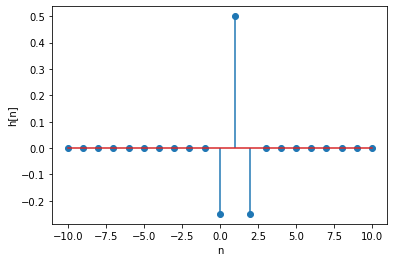

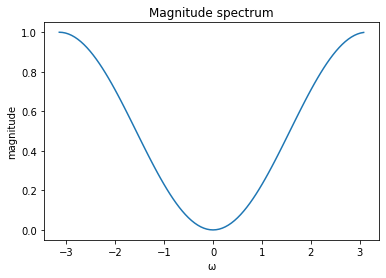

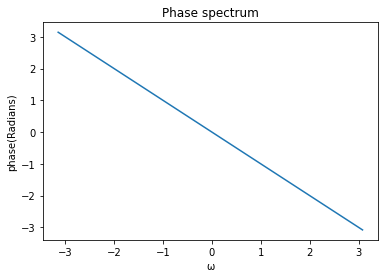

Observations:
1.From magnitude spectrum of impulse response we can observe that this system behaves as to that of high pass filter as low frequencies are attenuated and high frequencies are passed.
2.From phase spectrum of impulse response we can observe that this LTI system is linear phase system.


In [8]:
#2(e)
#defining the response signal 
def h(n):
    inp=-0.25*Delta(n)+0.50*Delta(n-1)-0.25*Delta(n-2)
    return inp

m=[i for i in range(-k,k+1)]
#response signal
he=[h(i) for i in m]
#DTFT of response signal
z = DTFT(W,he,m)
#plotting the response signal
plot_signal(m,he)
#plotting the magnitude and phase spectra
plot_spectrums(z,W)
print("Observations:")
print("1.From magnitude spectrum of impulse response we can observe that this system behaves as to that of high pass filter as low frequencies are attenuated and high frequencies are passed.")
print("2.From phase spectrum of impulse response we can observe that this LTI system is linear phase system.")

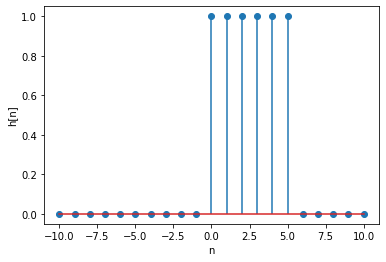

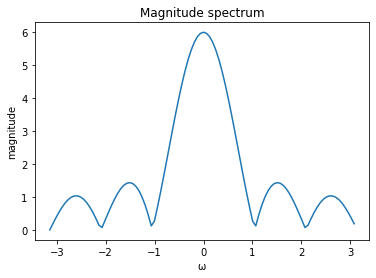

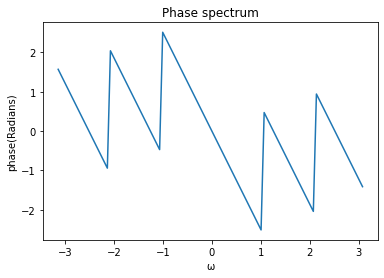

Observations:
1.From magnitude spectrum of impulse response we can observe that this system behaves similar to |sinc(w)|.
2.From phase spectrum of impulse response we can observe that this LTI system is linear phase system.


In [9]:
#2(f)
#defining the response signal
def h(n):
    if n>=0 and n<=5: #if 0<=n<=5 then it return 1
        return 1
    else:
        return 0 #else it returns 0

m=[i for i in range(-k,k+1)]
#response signal
hf=[h(i) for i in m]
#DTFT of response signal
z = DTFT(W,hf,m)
#plotting the response signal
plot_signal(m,hf)
#plotting the magnitude and phase spectra
plot_spectrums(z,W)
print("Observations:")
print("1.From magnitude spectrum of impulse response we can observe that this system behaves similar to |sinc(w)|.")
print("2.From phase spectrum of impulse response we can observe that this LTI system is linear phase system.")


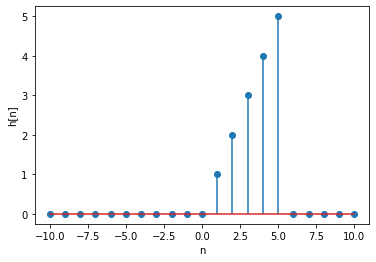

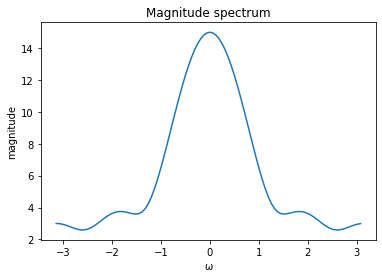

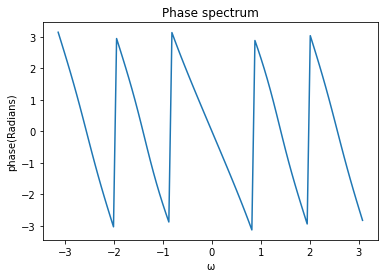

Observations:
1.From magnitude spectrum of impulse response we can observe that this system behaves similar to |sin(|sinw|)| getting damped.
2.From phase spectrum of impulse response we can observe that this LTI system is linear phase system.


In [10]:
#2(g)
#defining the response signal
def h(n):
    if n>=0 and n<=5: #if  0<=n<=5 then it returns n
        return n
    else:
        return 0 # else it returns 0

m=[i for i in range(-k,k+1)]
#response signal
hg=[h(i) for i in m]
#DTFT of response signal
z = DTFT(W,hg,m)
#plotting the response signal
plot_signal(m,hg)
#plotting the magnitude and phase spectra
plot_spectrums(z,W)
print("Observations:")
print("1.From magnitude spectrum of impulse response we can observe that this system behaves similar to |sin(|sinw|)| getting damped.")
print("2.From phase spectrum of impulse response we can observe that this LTI system is linear phase system.")


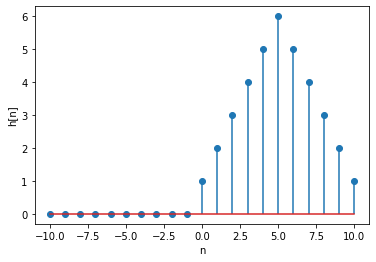

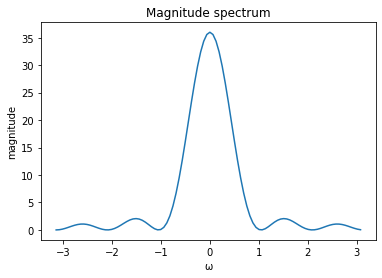

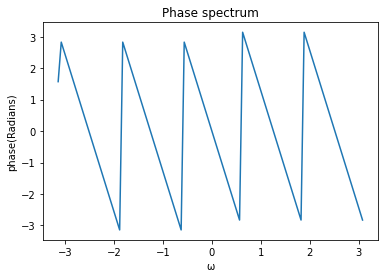

Observations:
1.From magnitude spectrum of impulse response we can observe that it's similar to sinc^2 function.
2.From phase spectrum of impulse response we can observe that this LTI system is linear phase system.


In [11]:
#2(h)
#defining the response signal
def h(n):
    if n>=0 and n<=5: #if 0<=n<=5 then it returns n+1
        return n+1
    elif 5<n<=10: #if 5<n<=10 then it again runs with h(10-n)
        s=h(10-n)
        return s
    else: #else in other condition it returns 0
        return 0

m=[i for i in range(-k,k+1)]
#response signal
hh=[h(i) for i in m]
#DTFT of response signal
z = DTFT(W,hh,m)
#plotting the response signal
plot_signal(m,hh)
#plotting the magnitude and phase spectra
plot_spectrums(z,W)
print("Observations:")
print("1.From magnitude spectrum of impulse response we can observe that it's similar to sinc^2 function.")
print("2.From phase spectrum of impulse response we can observe that this LTI system is linear phase system.")

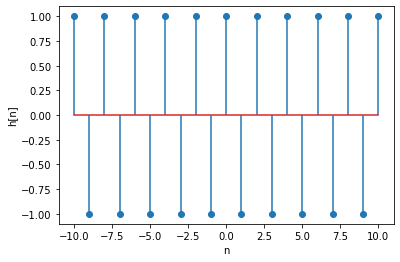

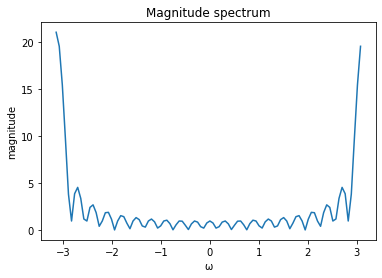

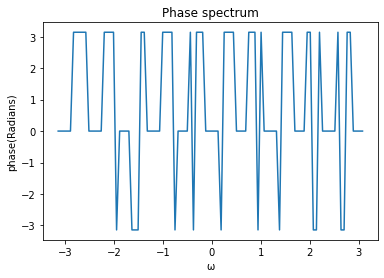

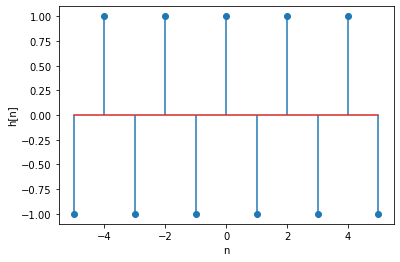

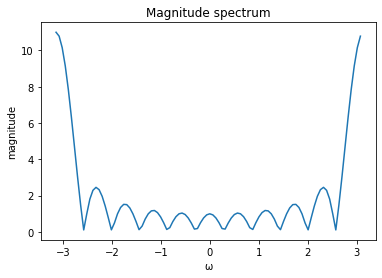

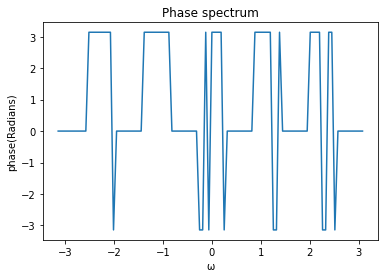

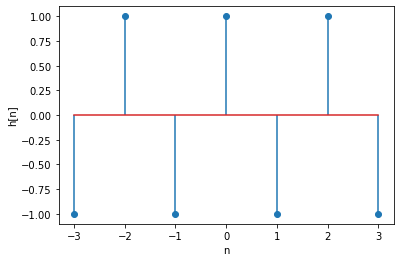

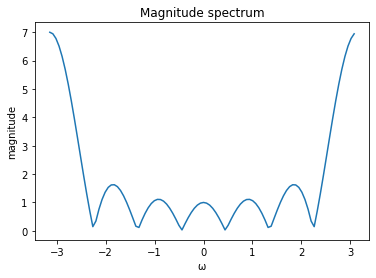

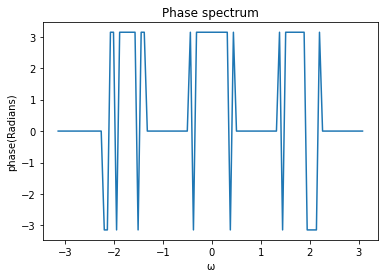

Observations:
1.From magnitude spectrum of impulse response we can observe that at w= -pi to pi rad/s, it's behaviour is same to that of delta function. but between -pi to pi rad/s, there are some irregularities because according to DTFT formula, the summation is taken from -N to N and not from -infinity to infinity. so, as N increses, these irregularities are reduced and for much greater than N, we observe that between -pi to pi rad/s, it tends to 0.
2.From phase spectrum of impulse response we can observe that this LTI system is linear phase system.


In [12]:
#2(i)
#different values of N i.e for 3 values of N
N =k
N1=5
N2=3
#defining the response signal
def h(n):
    s=np.cos(np.pi*n)
    return s

m=[i for i in range(-N,N+1)]
m1=[i for i in range(-N1,N1+1)]
m2=[i for i in range(-N2,N2+1)]
#response signal with different values of N
hi=[h(i) for i in m]
hi1=[h(i) for i in m1]
hi2=[h(i) for i in m2]
M=15
#DTFT of response signal with different values of N
z = DTFT(W,hi,m)
z1 = DTFT(W,hi1,m1)
z2 = DTFT(W,hi2,m2)
#plotting the response signal and plotting the magnitude and phase spectra
plot_signal(m,hi)
plot_spectrums(z,W)
plot_signal(m1,hi1)
plot_spectrums(z1,W)
plot_signal(m2,hi2)
plot_spectrums(z2,W)
print("Observations:")
print("1.From magnitude spectrum of impulse response we can observe that at w= -pi to pi rad/s, it's behaviour is same to that of delta function. but between -pi to pi rad/s, there are some irregularities because according to DTFT formula, the summation is taken from -N to N and not from -infinity to infinity. so, as N increses, these irregularities are reduced and for much greater than N, we observe that between -pi to pi rad/s, it tends to 0.")
print("2.From phase spectrum of impulse response we can observe that this LTI system is linear phase system.")

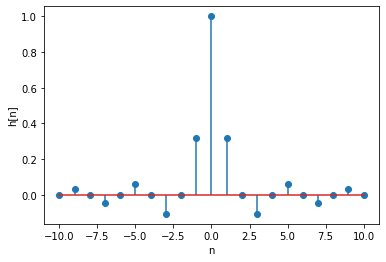

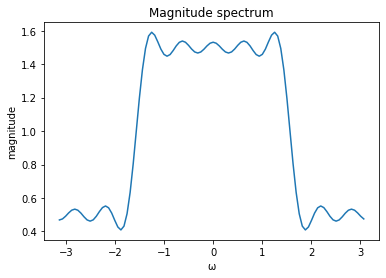

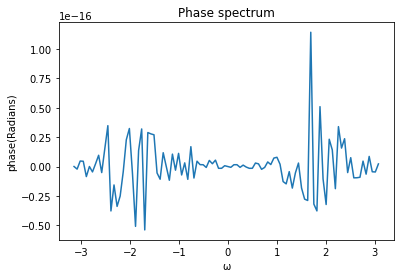

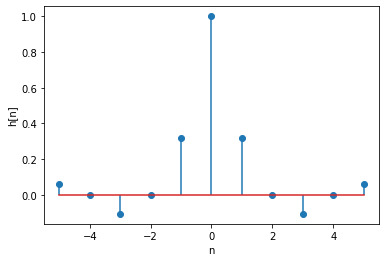

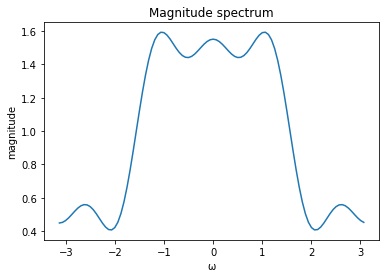

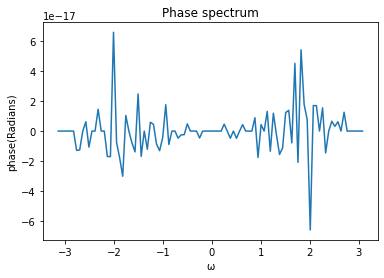

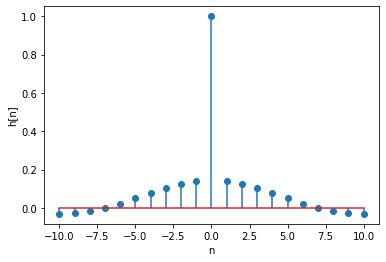

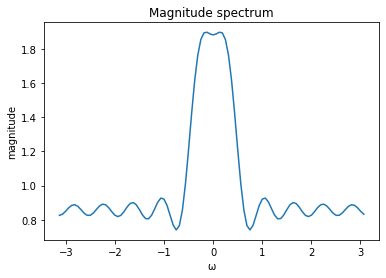

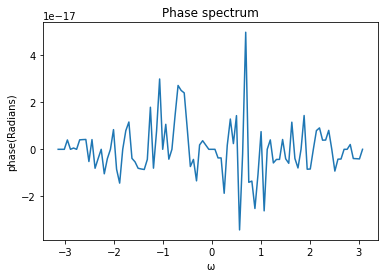

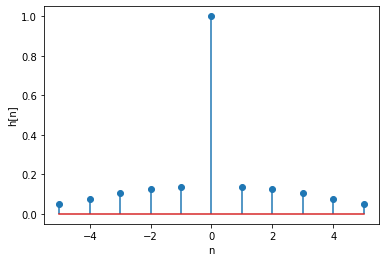

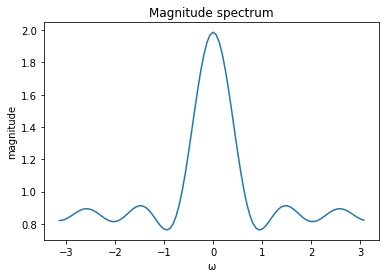

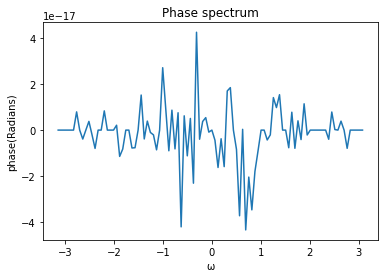

Observations:
1.From magnitude spectrum of impulse response we can observe that it's similar to that of rectangular fuction. but there are some irregularities because according to DTFT formula, the summation is taken from -M to M and not from -infinity to infinity. So, as M increases, these irregularities are reduced.
2.From phase spectrum of impulse response we can observe that this LTI system is linear phase system.


In [13]:
# 2(j)
#different values of M i.e for 2 values of M
M = k 
M1 = 5
#different values of w i.e for 2 values of w
w=np.pi/2
w1=np.pi/7
#defining the response signal
def h(n,w):
    if n==0: #if n==0 returns 1
        return 1
    else:
        return ((np.sin(w*n))/(np.pi*n)) #else it returns sin(wn)/pi*n

m=[i for i in range(-M,M+1)]
m1=[i for i in range(-M1,M1+1)]
#response signal with different values of M and w
hj=[h(i,w) for i in m]
hj1=[h(i,w) for i in m1]
hj2=[h(i,w1) for i in m]
hj3=[h(i,w1) for i in m1]

#DTFT of response signal with different values of M and w
z = DTFT(W,hj,m)
z1 = DTFT(W,hj1,m1)
z2 = DTFT(W,hj2,m)
z3 = DTFT(W,hj3,m1)
#plotting the signal
#plotting the response signal and plotting the magnitude and phase spectra
plot_signal(m,hj)
plot_spectrums(z,W)
plot_signal(m1,hj1)
plot_spectrums(z1,W)
plot_signal(m,hj2)
plot_spectrums(z2,W)
plot_signal(m1,hj3)
plot_spectrums(z3,W)
print("Observations:")
print("1.From magnitude spectrum of impulse response we can observe that it's similar to that of rectangular fuction. but there are some irregularities because according to DTFT formula, the summation is taken from -M to M and not from -infinity to infinity. So, as M increases, these irregularities are reduced.")
print("2.From phase spectrum of impulse response we can observe that this LTI system is linear phase system.")

Alarm signal DTFT spectrums:-


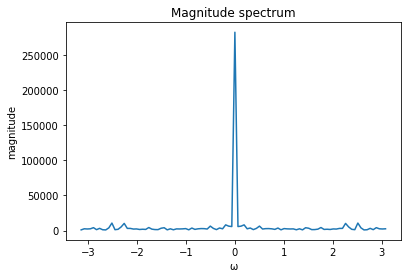

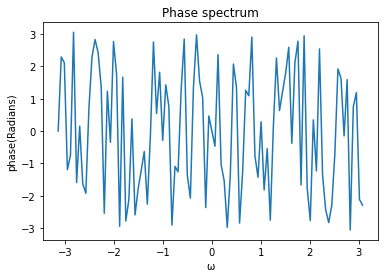

Cry signal DTFT spectrums:-


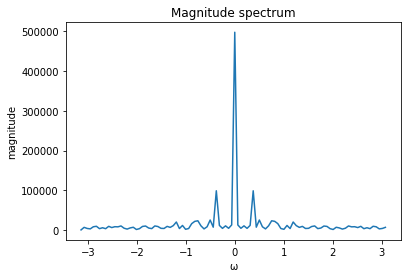

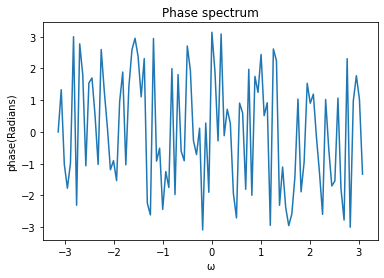

In [14]:
#Q3
s = wave.open('alarm.wav','rb')
anf = s.getnframes()
fs = s.getframerate()
asignal = s.readframes(anf)
s.close()
alarm_signal = np.frombuffer(asignal,dtype = np.int8)    #converting the array in byte format to int
print("Alarm signal DTFT spectrums:-")
n = np.linspace(0,anf-1,anf)
alarm_dtft = DTFT(W,alarm_signal,n)
plot_spectrums(alarm_dtft,W)

s = wave.open('cry.wav', 'rb')
cnf = s.getnframes()
csignal = s.readframes(cnf)
s.close()
cry_signal = []
cry_signal = np.frombuffer(csignal,dtype = np.int8)     #converting the array in byte format to int
print("Cry signal DTFT spectrums:-")
n = np.linspace(0,cnf-1,cnf)
cry_dtft = DTFT(W,cry_signal,n)
plot_spectrums(cry_dtft,W)

#creates a new .wav file with given paramaeters
def create_wave(sr,nfs,signal_frames):
    wf = wave.open(sr, 'wb')
    wf.setnchannels(1)
    wf.setsampwidth(1)
    wf.setframerate(nfs)
    wf.writeframesraw(signal_frames.astype('int8'))
    wf.close()
#     playsound(sr)       #uncomment this for playing the audio files

def plot_spectrums(y,w):
    mag = []
    phase = []
    for i in range(len(w)):
        mag.append(abs(y[i]))
        phase.append(np.angle(y[i]))
    #Plotting the spectrums
    plt.title("Magnitude spectrum")
    plt.xlabel("ω")
    plt.ylabel("magnitude")
    plt.plot(w,mag)
    plt.show()
#     plt.title("Phase spectrum")
#     plt.xlabel("ω")
#     plt.ylabel("phase(Radians)")
#     plt.plot(w,phase)
#     plt.show()

def dtftAndPlot(sr,signal,nf,H):
    output = Convolution(signal,H)
    create_wave(sr,fs,output)
    dtft = []
    n = np.linspace(-k,k+nf-1,2*k+nf)                  #Storing the indeces for the convolved signal(impulse response is from -k to k and wave signal is from 0 to nf)
    dtft = DTFT(W,output,n)
    plot_spectrums(dtft,W)
    

From the first question we see that convolution in time domain is same as multiplation of their DTFT's in frequency domain
In the second question we plotted the DTFT spectrums of the impulse responses.
So if we multiply the magnitude spectrums of both the wave signal and impulse response we get the magnitude spectrum of convolved signal.
Similarly the phase spectrums are added.

Convolution with alarm signal (DTFT spectrum plot):-


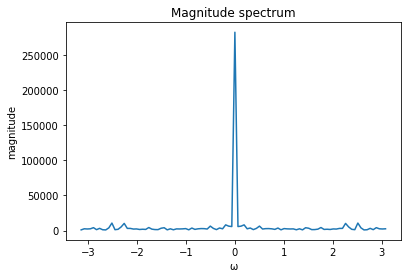

Convolution with cry signal (DTFT spectrum plot):-


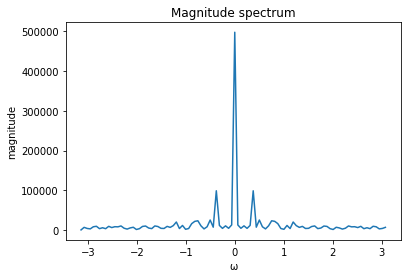

As we can see from the above plots , the convolved signal has the same magnitude spectrums as the given wave signal since the magnitude spectrum of the impulese response is a constant plot with value 1.
So convolution with delta gives back the same signal.


In [15]:
print("From the first question we see that convolution in time domain is same as multiplation of their DTFT's in frequency domain")
print("In the second question we plotted the DTFT spectrums of the impulse responses.")
print("So if we multiply the magnitude spectrums of both the wave signal and impulse response we get the magnitude spectrum of convolved signal.")
print("Similarly the phase spectrums are added.")
print()

#3(a)
print("Convolution with alarm signal (DTFT spectrum plot):-")
dtftAndPlot('alarm_a.wav',alarm_signal,anf,ha)
print("Convolution with cry signal (DTFT spectrum plot):-")
dtftAndPlot('cry_a.wav',cry_signal,cnf,ha)
print("As we can see from the above plots , the convolved signal has the same magnitude spectrums as the given wave signal since the magnitude spectrum of the impulese response is a constant plot with value 1.")
print("So convolution with delta gives back the same signal.")

Convolution with alarm signal (DTFT spectrum plot):-


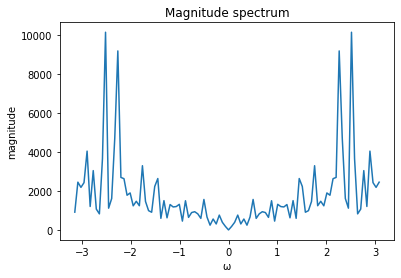

Convolution with cry signal (DTFT spectrum plot):-


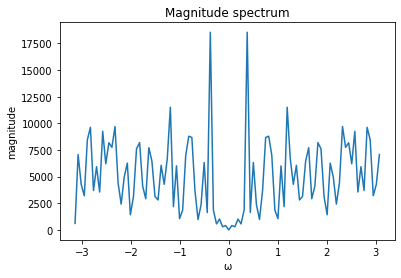

From 2(b) we see that the impulse response is a high pass filter , so the lower frequencies are attenuated when we multiply the magnitude spectrums as we can see in the above plots.


In [16]:
#3(b)
print("Convolution with alarm signal (DTFT spectrum plot):-")
dtftAndPlot('alarm_b.wav',alarm_signal,anf,hb)
print("Convolution with cry signal (DTFT spectrum plot):-")
dtftAndPlot('cry_b.wav',cry_signal,cnf,hb)
print("From 2(b) we see that the impulse response is a high pass filter , so the lower frequencies are attenuated when we multiply the magnitude spectrums as we can see in the above plots.")

Convolution with alarm signal (DTFT spectrum plot):-


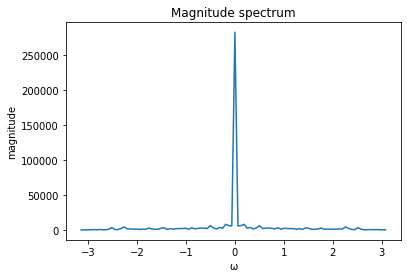

Convolution with cry signal (DTFT spectrum plot):-


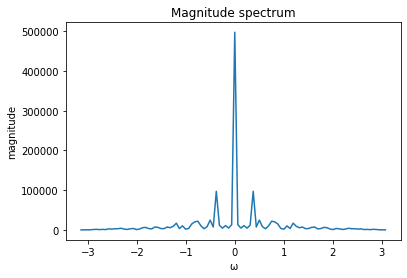

From 2(c) we see that the impulse resopnse is a low pass filter, so when we multiply the magnitude spectums the higher frequencies are attenuated as we can see from the above plots.


In [17]:
#3(c)
print("Convolution with alarm signal (DTFT spectrum plot):-")
dtftAndPlot('alarm_c.wav',alarm_signal,anf,hc)
print("Convolution with cry signal (DTFT spectrum plot):-")
dtftAndPlot('cry_c.wav',cry_signal,cnf,hc)
print("From 2(c) we see that the impulse resopnse is a low pass filter, so when we multiply the magnitude spectums the higher frequencies are attenuated as we can see from the above plots.")

Convolution with alarm signal (DTFT spectrum plot):-


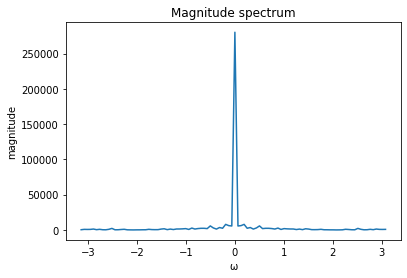

Convolution with cry signal (DTFT spectrum plot):-


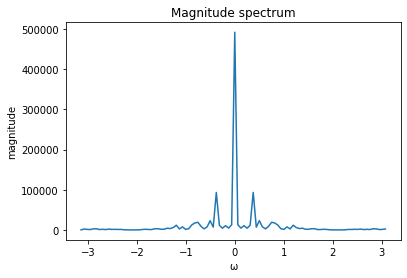

From 2(d) we see that the impulse resopnse is a band stop filter, so when we multiply the magnitude spectums the frequencies close to ω = 2 are attenuated and rest of the spectrum remains same as we can see from the above plots.


In [18]:
#3(d)
print("Convolution with alarm signal (DTFT spectrum plot):-")
dtftAndPlot('alarm_d.wav',alarm_signal,anf,hd)
print("Convolution with cry signal (DTFT spectrum plot):-")
dtftAndPlot('cry_d.wav',cry_signal,cnf,hd)
print("From 2(d) we see that the impulse resopnse is a band stop filter, so when we multiply the magnitude spectums the frequencies close to ω = 2 are attenuated and rest of the spectrum remains same as we can see from the above plots.")

Convolution with alarm signal (DTFT spectrum plot):-


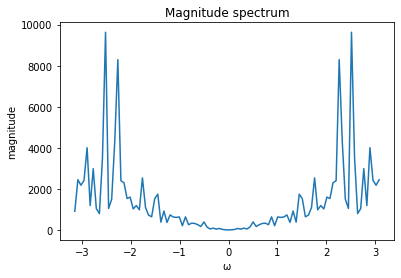

Convolution with cry signal (DTFT spectrum plot):-


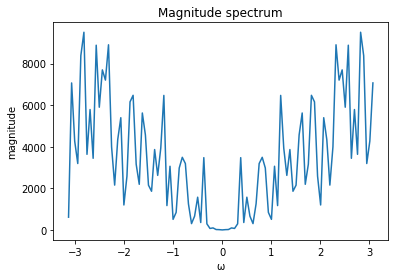

From 2(e) we see that the impulse response is a high pass filter , so the lower frequencies are attenuated when we multiply the magnitude spectrums as we can see in the above plots.


In [19]:
#3(e)
print("Convolution with alarm signal (DTFT spectrum plot):-")
dtftAndPlot('alarm_e.wav',alarm_signal,anf,he)
print("Convolution with cry signal (DTFT spectrum plot):-")
dtftAndPlot('cry_e.wav',cry_signal,cnf,he)
print("From 2(e) we see that the impulse response is a high pass filter , so the lower frequencies are attenuated when we multiply the magnitude spectrums as we can see in the above plots.")

Convolution with alarm signal (DTFT spectrum plot):-


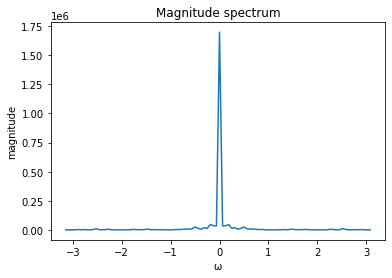

Convolution with cry signal (DTFT spectrum plot):-


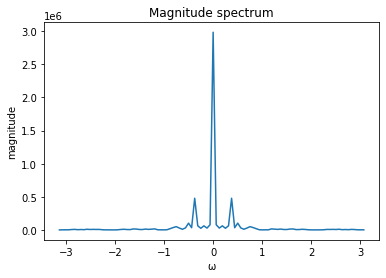

From 2(f) we see that the magnitude spectrum of impulse resopnse is zero at around ω = 1,2,3 , so when we multiply the magnitude spectums the frequencies close ω = 1,2,3 are attenuated and rest of the spectrum remains same as we can see from the above plots.


In [20]:
#3(f)
print("Convolution with alarm signal (DTFT spectrum plot):-")
dtftAndPlot('alarm_f.wav',alarm_signal,anf,hf)
print("Convolution with cry signal (DTFT spectrum plot):-")
dtftAndPlot('cry_f.wav',cry_signal,cnf,hf)
print("From 2(f) we see that the magnitude spectrum of impulse resopnse is zero at around ω = 1,2,3 , so when we multiply the magnitude spectums the frequencies close ω = 1,2,3 are attenuated and rest of the spectrum remains same as we can see from the above plots.")

Convolution with alarm signal (DTFT spectrum plot):-


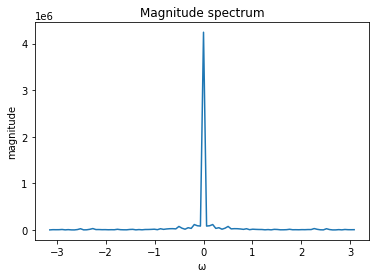

Convolution with cry signal (DTFT spectrum plot):-


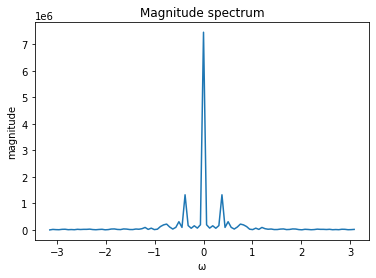

From 2(g) we see that the magnitude spectrum of impulse resopnse is high at ω = 0 and decreases to zero when we reach ω = pi
So when we multiply the magnitude spectrums it will look like a magnified version of the wave signal's DTFT at around ω = 0  and the rest of the spectrum is almost same.


In [21]:
#3(g)
print("Convolution with alarm signal (DTFT spectrum plot):-")
dtftAndPlot('alarm_g.wav',alarm_signal,anf,hg)
print("Convolution with cry signal (DTFT spectrum plot):-")
dtftAndPlot('cry_g.wav',cry_signal,cnf,hg)
print("From 2(g) we see that the magnitude spectrum of impulse resopnse is high at ω = 0 and decreases to zero when we reach ω = pi")
print("So when we multiply the magnitude spectrums it will look like a magnified version of the wave signal's DTFT at around ω = 0  and the rest of the spectrum is almost same.")

Convolution with alarm signal (DTFT spectrum plot):-


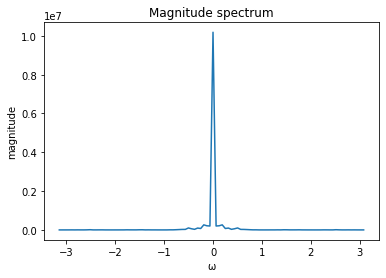

Convolution with cry signal (DTFT spectrum plot):-


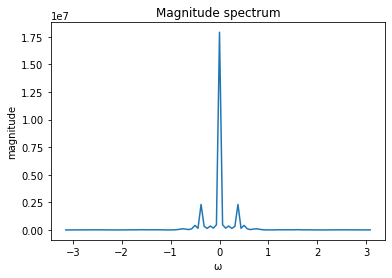

From 2(h) we see that the magnitude spectrum of impulse resopnse is zero at around ω = 1,2,3 , so when we multiply the magnitude spectums the frequencies close ω = 1,2,3 are attenuated and rest of the spectrum remains same as we can see from the above plots.


In [22]:
#3(h)
print("Convolution with alarm signal (DTFT spectrum plot):-")
dtftAndPlot('alarm_h.wav',alarm_signal,anf,hh)
print("Convolution with cry signal (DTFT spectrum plot):-")
dtftAndPlot('cry_h.wav',cry_signal,cnf,hh)
print("From 2(h) we see that the magnitude spectrum of impulse resopnse is zero at around ω = 1,2,3 , so when we multiply the magnitude spectums the frequencies close ω = 1,2,3 are attenuated and rest of the spectrum remains same as we can see from the above plots.")

Convolution with alarm signal (DTFT spectrum plot):-


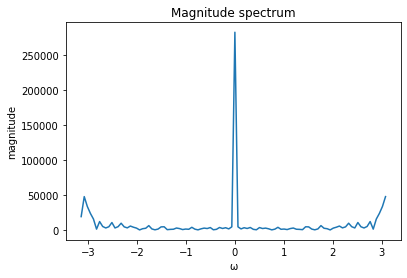

Convolution with cry signal (DTFT spectrum plot):-


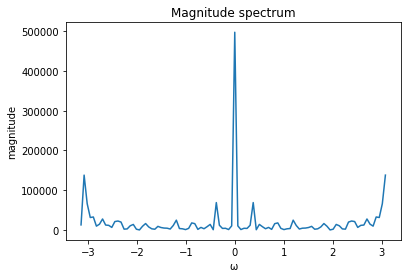

From 2(i), we can see that magnitude spectrum of impulse response behaves like a delta function at w=-pi and +pi rad/s.So, from magnitude spectrum of output convoluted signal, we observe that at w=-pi and +pi rad/s, it is same as DTFT of input signal.


In [23]:
#3(i)
print("Convolution with alarm signal (DTFT spectrum plot):-")
dtftAndPlot('alarm_i.wav',alarm_signal,anf,hi)
print("Convolution with cry signal (DTFT spectrum plot):-")
dtftAndPlot('cry_i.wav',cry_signal,cnf,hi)
print("From 2(i), we can see that magnitude spectrum of impulse response behaves like a delta function at w=-pi and +pi rad/s.So, from magnitude spectrum of output convoluted signal, we observe that at w=-pi and +pi rad/s, it is same as DTFT of input signal.")

Convolution with alarm signal (DTFT spectrum plot):-


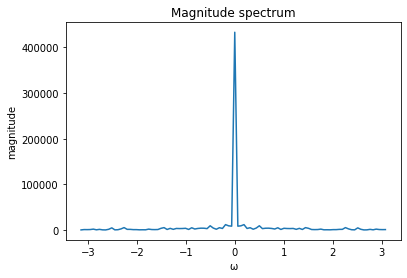

Convolution with cry signal (DTFT spectrum plot):-


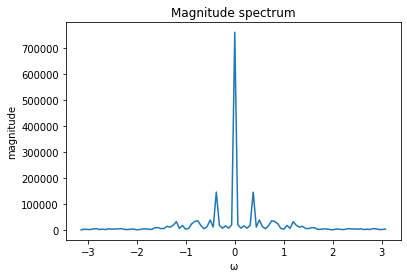

From 2(j) we see that the magnitude spectrum of the impulse response is a rectangular plot till around ω = 2, so when we multiply the spectrums the part after ω = 2 is attenuated


In [24]:
#3(j)
print("Convolution with alarm signal (DTFT spectrum plot):-")
dtftAndPlot('alarm_j.wav',alarm_signal,anf,hj)
print("Convolution with cry signal (DTFT spectrum plot):-")
dtftAndPlot('cry_j.wav',cry_signal,cnf,hj)
print("From 2(j) we see that the magnitude spectrum of the impulse response is a rectangular plot till around ω = 2, so when we multiply the spectrums the part after ω = 2 is attenuated")